# 🎯 正则化（Regularization）简介

---

## 📌 什么是正则化？

正则化是指在模型训练过程中，通过引入**额外限制**（通常是惩罚项）来控制模型复杂度，从而**防止过拟合、提升泛化能力**。

其核心思想是：相比于高度复杂、对训练数据过度拟合的模型，我们更偏好简单、对数据具有一般性解释力的模型。

---

## ⚖️ 为什么需要正则化？

在机器学习中，模型可能会面临两种典型的性能瓶颈：

- **Underfitting（欠拟合）**：模型太简单，无法捕捉训练数据的规律。
- **Overfitting（过拟合）**：模型太复杂，把训练数据的噪声也学了进去，导致泛化能力下降。

(具体可以参考 generalization_and_tuning/fitting 部分）


正则化的目标就是在模型复杂度与训练误差之间**寻找最佳平衡点**，提高模型在未知数据上的表现。

---

## 📚 常见正则化方法分类

| 类型             | 方法示例                                       | 应用阶段       |
|------------------|------------------------------------------------|----------------|
| 参数级正则化     | L1 正则化（Lasso）、L2 正则化（Ridge）         | 损失函数中      |
| 训练过程正则化   | Dropout、Early Stopping                         | 优化训练流程    |
| 数据增强型       | Data Augmentation、Label Smoothing             | 数据或标签处理  |

---

## 🧠 如何工作？

大多数正则化方法的形式为：

$$
\text{Loss}_{\text{total}} = \text{Loss}_{\text{data}} + \lambda \cdot \text{Penalty}
$$

其中：
- $\text{Loss}_{\text{data}}$ 是原始任务损失（如 MSE、Cross Entropy）
- $\text{Penalty}$ 是基于参数的惩罚项（如 $\sum |w_i|$ 或 $\sum w_i^2$）
- $\lambda$ 是正则化强度超参数（需调参）

---

## ✅ 接下来你将学习的正则化方法模块

| Block 名称       | 方法                                      |
|------------------|-------------------------------------------|
| 📦 Block 1        | L1 正则化（Lasso）                        |
| 📦 Block 2        | L2 正则化（Ridge）                        |
| 📦 Block 3        | Dropout（神经网络结构层面）              |
| 📦 Block 4        | Early Stopping（训练流程层面）            |
| 📦 Block 5（可选）| Data Augmentation、Label Smoothing 等扩展 |

---


# 📦 L1 正则化（Lasso）

---

## 🧭 介绍

L1 正则化（Lasso）是通过对模型参数引入 **L1 范数惩罚项**（即绝对值和）来约束模型复杂度的技术。它能够促使部分权重精确变为 0，从而在建模中自动执行**特征选择**。

---

## 📐 参数与公式定义

假设模型损失函数为 $L(\theta)$，L1 正则化形式为：

$$
\text{Loss}_{\text{total}} = L(\theta) + \lambda \sum_i |\theta_i|
$$

其中：
- $\theta$ 是模型参数
- $\lambda$ 控制正则化强度，越大越稀疏

---

## 🧠 特性

- 通过梯度下降时对每个参数执行“软阈值”压缩
- 一些参数可能被压缩为 0，实现稀疏建模
- 对于线性模型，等价于在参数空间加入菱形约束边界

---

## ⚖️ 优缺点

| ✅ 优点                          | ⚠️ 缺点                        |
|----------------------------------|-------------------------------|
| 可自动进行特征选择（参数变为 0）     | 解不唯一，特征相关性高时不稳定        |
| 易于解释，模型更简单               | 在高相关特征下不如 L2 平滑        |
| 提高泛化能力，适合稀疏问题         | 梯度不连续，优化较难            |

---

## 🔧 常用于场景

- 高维数据建模（如文本分类、金融建模）
- 需要模型可解释性时
- 特征选择（如在变量远多于样本数时）

---

## 💬 面试常见问题（含简答）

1. **L1 和 L2 正则化有什么区别？**  
   L1 会使部分参数变为 0（稀疏性），L2 会缩小所有参数但不至为 0（平滑性）。

2. **L1 正则化如何实现特征选择？**  
   优化过程中部分参数因 L1 范数被压缩为 0，等价于去除对应特征。

3. **如何调节 L1 正则化的强度？**  
   通过超参数 $\lambda$，可用交叉验证选择最优值。

4. **L1 正则化是否会影响模型收敛？**  
   是，由于 $|\theta|$ 在 $\theta=0$ 处不可导，优化更困难（需使用次梯度）。

5. **L1 正则化的几何意义是什么？**  
   在参数空间中，L1 相当于将优化约束在一个菱形区域上（可导致角点 → 参数为 0）。



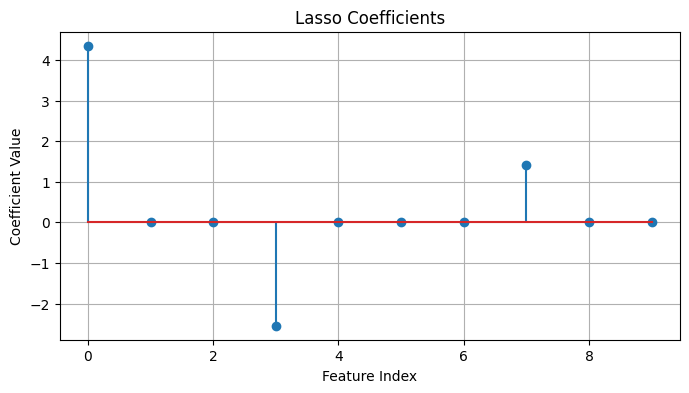

Number of selected features: 3


In [2]:
import numpy as np
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

# 生成模拟数据
np.random.seed(42)
X = np.random.randn(100, 10)
true_coef = np.array([5, 0, 0, -3, 0, 0, 0, 2, 0, 0])  # 稀疏
y = X @ true_coef + np.random.normal(0, 1, size=100)

# 使用 Lasso 拟合
model = Lasso(alpha=0.5)  # α = λ
model.fit(X, y)

# 可视化权重
plt.figure(figsize=(8, 4))
plt.stem(model.coef_)
plt.title("Lasso Coefficients")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.show()

# 打印被压为 0 的特征数量
print("Number of selected features:", np.sum(model.coef_ != 0))


# 📦 L2 正则化（Ridge）

---

## 🧭 介绍

L2 正则化（Ridge）通过在损失函数中引入参数平方惩罚项，鼓励模型权重变得更小、更平滑，从而降低模型复杂度并提高泛化能力。

与 L1 不同，L2 不会让权重变成 0，而是将它们压缩得更小。

---

## 📐 参数与公式定义

设原始损失为 $L(\theta)$，L2 正则化形式为：

$$
\text{Loss}_{\text{total}} = L(\theta) + \lambda \sum_i \theta_i^2
$$

其中：
- $\lambda$ 控制正则化强度，越大 → 惩罚越强
- 惩罚项为参数的 L2 范数平方

---

## 🧠 特性

- 所有参数都会收缩，但不会稀疏为 0
- 模型更平滑、更稳定
- 等价于在参数空间加入球形约束边界

---

## ⚖️ 优缺点

| ✅ 优点                                | ⚠️ 缺点                         |
|----------------------------------------|----------------------------------|
| 提高模型稳定性、降低过拟合               | 无法执行特征选择（不会稀疏）       |
| 优化简单，导数连续，梯度平滑               | 无法从高维特征中“挑出”重要变量   |
| 适合特征数量多、但不需要稀疏的场景         | 对异常特征仍可能敏感              |

---

## 🔧 常用于场景

- 神经网络训练（默认带 L2 正则）
- 线性回归 / 逻辑回归（用于防止过拟合）
- 特征量大、共线性强的建模任务

---

## 💬 面试常见问题（含简答）

1. **L2 正则化的本质作用是什么？**  
   防止模型参数过大，增强模型稳定性和泛化能力。

2. **与 L1 相比，L2 有哪些不同？**  
   L2 会缩小所有参数但不为 0，而 L1 会使部分参数变为 0。

3. **为什么神经网络默认使用 L2 正则化？**  
   因为它导数连续、优化更稳定，适合高维连续模型。

4. **L2 正则化的几何意义是什么？**  
   等价于在参数空间中加一个球形约束，鼓励权重均匀收缩。

5. **如何调节 L2 的强度？**  
   使用超参数 $\lambda$ 控制，一般通过交叉验证寻找最优值。



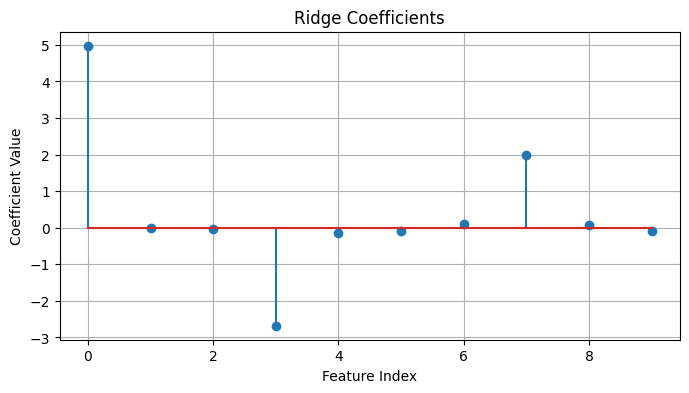

Number of non-zero coefficients: 10


In [4]:
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

# 生成模拟数据
np.random.seed(0)
X = np.random.randn(100, 10)
true_coef = np.array([5, 0, 0, -3, 0, 0, 0, 2, 0, 0])
y = X @ true_coef + np.random.normal(0, 1, size=100)

# 使用 Ridge 拟合
model = Ridge(alpha=1.0)
model.fit(X, y)

# 可视化权重
plt.figure(figsize=(8, 4))
plt.stem(model.coef_)
plt.title("Ridge Coefficients")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.show()

# 查看非零特征数（注意不会稀疏）
print("Number of non-zero coefficients:", np.sum(model.coef_ != 0))


# 📊 L1 vs L2 正则化对照表

| 维度               | L1 正则化（Lasso）                          | L2 正则化（Ridge）                          |
|--------------------|--------------------------------------------|---------------------------------------------|
| 📐 惩罚项形式       | $\lambda \sum_i |\theta_i|$                | $\lambda \sum_i \theta_i^2$                 |
| 🎯 数学名称         | L1 范数                                   | L2 范数                                     |
| 🎯 几何形状         | 菱形（diamond）约束边界                    | 圆形（sphere）约束边界                      |
| 🧠 权重压缩行为     | 有些权重被压为 0（稀疏）                    | 所有权重变小但不为 0                        |
| ✅ 特征选择         | ✅ 可自动选择特征（剔除无关特征）            | ❌ 无特征选择能力                           |
| 🧠 模型稀疏性       | ✅ 会产生稀疏解                             | ❌ 不会稀疏化参数                            |
| 🔄 可导性           | ❌ 在 0 点不可导（需使用次梯度）              | ✅ 处处可导，优化更稳定                      |
| 💥 对异常值鲁棒性   | ✅ 较强（L1 更关注中位数）                   | ❌ 对异常值更敏感                            |
| 🧪 共线性变量处理   | ❌ 不稳定，多个变量相关时随机选择一个保留      | ✅ 更稳定，均匀分配权重                      |
| 📊 应用场景         | 特征选择、高维稀疏建模                      | 稳定拟合、深度学习、标准回归任务            |
| 🧠 可解释性         | ✅ 强（变量直接被 0 剔除）                   | 一般（变量全部保留）                        |
| 🧰 优化难度         | 中（梯度不连续）                            | 易（梯度连续，支持封闭解）                   |

---

## ✅ 总结建议

- 如果你需要稀疏模型（比如特征多但大多数无效）→ **用 L1**
- 如果你想要更稳定的拟合且无需特征选择 → **用 L2**
- 如果你想两者兼得，也可以使用 **Elastic Net（L1 + L2 混合正则）**



# 📦 Dropout 正则化（用于神经网络）

---

## 🧭 介绍

Dropout 是一种用于神经网络训练中的结构正则化方法。其核心思想是：
> 在每次前向传播时，**随机“丢弃”一部分神经元（及其连接）**，从而防止神经元之间过度协同（co-adaptation）。

它相当于在训练时构造了多个不同子网络，使模型更鲁棒、更泛化。

---

## 📐 参数与公式定义

- 参数 $p$：每个神经元被保留（不丢弃）的概率，典型值如 $p=0.5$。
- 训练时：
  $$
  \text{output} = \text{activation} \times \text{mask}, \quad \text{mask} \sim \text{Bernoulli}(p)
  $$
- 推理时：
  - 不再随机屏蔽，而是将所有激活乘以 $p$（或在训练时除以 $p$）

---

## 🧠 特性

- 增加了训练过程中的随机性
- 降低了模型对特定路径的依赖
- 可以视为一种“模型集成”（不同子网络平均）

---

## ⚖️ 优缺点

| ✅ 优点                                  | ⚠️ 缺点                               |
|------------------------------------------|----------------------------------------|
| 显著减少过拟合、提高泛化能力              | 训练时间变长                           |
| 类似于集成多个模型、提升鲁棒性             | 仅适用于深度网络，不适用于线性模型等      |
| 实现简单、无需额外结构改动                 | 需要结合 BatchNorm 或 LR 调整            |

---

## 🔧 常用于场景

- 深度神经网络（CNN、RNN、MLP）
- 图像、文本、语音等高维感知任务
- 搭配 BatchNorm / ReLU 使用

---

## 💬 面试常见问题（含简答）

1. **Dropout 是怎么工作的？**  
   训练时随机屏蔽部分神经元，防止 co-adaptation，增强泛化能力。

2. **Dropout 推理时为什么要乘以保留概率？**  
   为了保持期望一致性，防止预测偏移。

3. **Dropout 可以用于输入层吗？**  
   可以，称为 input dropout，尤其适合对输入进行正则化的 NLP 模型。

4. **Dropout 与 BatchNorm 能一起用吗？**  
   可以一起用，顺序通常为：Dense → BatchNorm → ReLU → Dropout。

5. **Dropout 有哪些变体？**  
   如 SpatialDropout（按通道丢弃）、Variational Dropout（贝叶斯方法）等。



In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# 固定随机种子（确保 eval 模式下可复现）
torch.manual_seed(42)

# 模型定义
class DropoutNet(nn.Module):
    def __init__(self):
        super(DropoutNet, self).__init__()
        self.fc1 = nn.Linear(20, 64)
        self.dropout = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc2(x))
        return x

# 初始化模型与输入数据
x = torch.randn(1, 20)
model = DropoutNet()

# 🔧 模式 1：train 模式（Dropout 有效，输出会变化）
model.train()
print("Train Mode Output 1:", model(x).item())
print("Train Mode Output 2:", model(x).item())

# 🔧 模式 2：eval 模式（Dropout 关闭，输出稳定）
model.eval()
print("Eval Mode Output 1:", model(x).item())
print("Eval Mode Output 2:", model(x).item())


Train Mode Output 1: 0.36487793922424316
Train Mode Output 2: 0.4901680052280426
Eval Mode Output 1: 0.4675334095954895
Eval Mode Output 2: 0.4675334095954895


# 🛑 Early Stopping（提前停止）

---

## 🧭 介绍

Early Stopping 是一种简单而有效的训练过程型正则化方法：

> 在训练过程中，**一旦模型在验证集上的性能不再提升（甚至下降）**，就提前停止训练，以防止过拟合。

通常搭配深度学习、集成学习（如 XGBoost）使用，效果显著。

---

## 📐 参数与控制策略

- `monitor`: 监控的指标，如 `val_loss`、`val_accuracy`
- `patience`: 容忍多少轮未提升才停（如 5）
- `min_delta`: 最小提升幅度，低于视为无提升
- `mode`: 指标是希望 “越大越好” 还是 “越小越好”（`'min'` vs `'max'`）

---

## 🧠 特性

- 不改变模型结构
- 控制训练时长，节省资源
- 强依赖验证集性能曲线
- 通常与 Checkpoint 搭配，保存最佳参数

---

## ⚖️ 优缺点

| ✅ 优点                          | ⚠️ 缺点                          |
|----------------------------------|-----------------------------------|
| 防止过拟合，提升泛化能力           | 需设置超参数（如 patience）        |
| 自动终止，节省训练时间             | 验证集波动可能导致过早停止          |
| 简单易实现，无需额外结构           | 对随机性敏感，结果不总是稳定         |

---

## 🔧 常用于场景

- 深度学习模型（如 CNN / LSTM）
- Boosting 系列（如 XGBoost、LightGBM）
- 验证集表现起伏较明显的场景

---

## 💬 面试常见问题（含简答）

1. **Early Stopping 的原理是什么？**  
   一旦验证集性能不再提升，提前停止训练，避免过拟合。

2. **patience 是什么？如何设置？**  
   指的是在验证集未提升时，最多容忍多少 epoch。通常取 5~10。

3. **Early Stopping 有哪些缺点？**  
   对波动敏感，易提前终止；需依赖验证集表现，不适合验证集不稳定的任务。

4. **和正则化（L1/L2）相比有何不同？**  
   L1/L2 是结构级约束，Early Stopping 是训练过程控制。

5. **Early Stopping 是否适用于回归任务？**  
   可以，只需选择合适的 `val_loss`（如 MSE）监控指标。


⛔ Early Stopped at Epoch 25


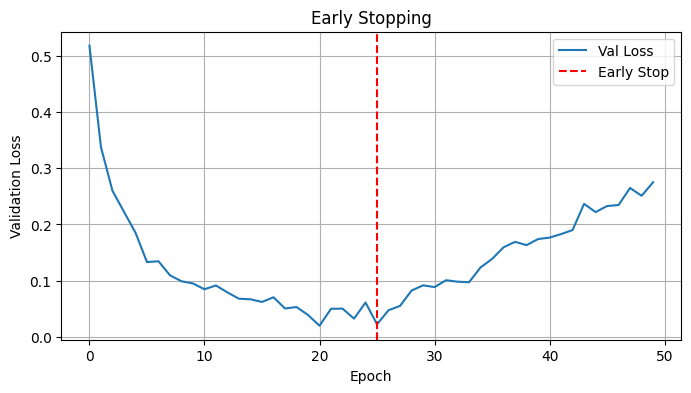

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# 模拟训练过程中的验证损失（前期下降，后期过拟合）
np.random.seed(0)
epochs = 50
val_loss = np.array([1 / (e + 2) + np.random.normal(0, 0.01) for e in range(25)] +
                    [1 / 27 + (e - 25) * 0.01 + np.random.normal(0, 0.01) for e in range(25, 50)])

# Early Stopping 实现（简单模拟）
best_loss = float('inf')
patience = 5
counter = 0
early_stop_epoch = None

for epoch in range(epochs):
    loss = val_loss[epoch]
    if loss < best_loss - 1e-3:
        best_loss = loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            early_stop_epoch = epoch
            print(f"⛔ Early Stopped at Epoch {epoch}")
            break

# 可视化
plt.figure(figsize=(8, 4))
plt.plot(val_loss, label="Val Loss")
if early_stop_epoch:
    plt.axvline(early_stop_epoch, color='r', linestyle='--', label='Early Stop')
plt.title("Early Stopping")
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid(True)
plt.show()


# 🔄 Data Augmentation & Label Smoothing

---

## 🧭 简介

这两种方法属于 **输入/标签级正则化**，不是结构或优化器约束，但依然有效缓解过拟合：

| 方法             | 核心思想                                        |
|------------------|-------------------------------------------------|
| Data Augmentation | 增加训练样本的多样性（如旋转、裁剪、加噪）       |
| Label Smoothing   | 将硬标签变为软标签，减少模型过拟合到错误数据      |

---

## 📌 Data Augmentation 数据增强

### 💡 核心思路：

> 通过对输入样本进行扰动（如旋转、缩放、剪裁、噪声等），**人为扩充训练集规模和分布**。

### 🧰 常见增强方法：

- 图像：旋转、平移、翻转、模糊、颜色扰动
- 文本：同义词替换、随机删除、回译（back-translation）
- 音频：加噪声、时移、变速

### ✅ 优点：
- 显著提升泛化能力
- 减少对大数据集的依赖
- 易与深度模型集成（如 torchvision）

---

## 📌 Label Smoothing 标签平滑

### 💡 核心思路：

> 将独热标签从 $\mathbf{y} = [0, 1, 0]$ 修改为 $\mathbf{y} = [\varepsilon/K, 1 - \varepsilon, \varepsilon/K]$  
> 即在目标类上保留主要概率，在非目标类上分配少量概率。

### 📐 公式：

$$
y^{LS}_i = (1 - \varepsilon) \cdot y_i + \frac{\varepsilon}{K}
$$

- $\varepsilon$: 平滑系数，一般为 0.1
- $K$: 类别数
- $y_i$: 原始 one-hot 标签

### ✅ 优点：
- 避免模型过度自信（过拟合训练标签）
- 提高分类鲁棒性，特别是多分类任务
- 可以抵御标签错误或脏数据

---

## 💬 面试常见问题（含简答）

1. **什么是数据增强？为什么能减少过拟合？**  
   数据增强通过人为扰动样本，增加训练多样性，使模型更鲁棒，防止学得过于“死板”。

2. **哪些任务中最常用数据增强？**  
   图像分类、语音识别、文本分类等数据高维但数据量不足的任务。

3. **Label Smoothing 的作用？**  
   防止模型对训练集标签过拟合，避免过度自信输出概率 1，提高泛化。

4. **Label Smoothing 会影响预测精度吗？**  
   通常不会。它会降低训练集精度但提升验证/测试集泛化能力。

5. **Label Smoothing 是否适用于回归任务？**  
   否，Label Smoothing 是分类任务的正则手段，不适用于连续标签。



In [29]:
import torch
import torch.nn.functional as F

def label_smoothing(targets, num_classes, epsilon=0.1):
    """
    将 one-hot 标签转换为 label-smoothed 标签。
    targets: LongTensor，形如 [1, 0, 2]
    """
    one_hot = F.one_hot(targets, num_classes).float()
    smoothed = one_hot * (1 - epsilon) + epsilon / num_classes
    return smoothed

# 示例：3 类分类问题
y = torch.tensor([1, 0, 2])
smooth_y = label_smoothing(y, num_classes=3, epsilon=0.1)
print(smooth_y)


tensor([[0.0333, 0.9333, 0.0333],
        [0.9333, 0.0333, 0.0333],
        [0.0333, 0.0333, 0.9333]])
